# US Air Pollution Kaggle EDA

This is an exploratory data analysis. In this notebook, I explore the US Pollution dataset from Kaggle.

## Table of Contents

1. Importing required Python libraries
2. Dataset description
3. Importing the dataset
4. Overview of the dataset
5. Univariate analysis
6. Multivariate analysis

## 1. Importing required Python libraries

In this exploratory data analysis, I will need NumPy, Pandas, and Matplotlib (for visualization). (May also need Seaborn later on for more in-depth visualization)

In [3]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

## 2. Dataset description

For this project, I used the US pollution dataset from Kaggle. It can be found here:

https://www.kaggle.com/datasets/sogun3/uspollution/data

It contains data on the daily amount of four pollutants found in different areas throughout the United States, from 2000 to 2016. These pollutants are: Nitrogen Dioxide (NO2), Sulphur Dioxide (SO2), Carbon Monoxide (CO) and Ozone (O3). 

The dataset contains 1746661 number of data points and 28 number of attributes. 

The attribute information is as follows:

1. State Code
2. County Code
3. Site Num
4. Address
5. State
6. County
7. City
8. Date Local
9. NO2 Units
10. NO2 Mean
11. NO2 1st Max Value
12. NO2 1st Max Hour
13. NO2 AQI (Air Quality Index)
14. O3 Units
15. O3 Mean
16. O3 1st Max Value
17. O3 1st Max Hour
18. O3 AQI (Air Quality Index)
19. SO2 Units
20. SO2 Mean
21. SO2 1st Max Value
22. SO2 1st Max Hour
23. SO2 AQI (Air Quality Index)
24. CO Units
25. CO Mean
26. CO 1st Max Value
27. CO 1st Max Hour
28. CO AQI (Air Quality Index)

I will be focusing primarily on the AQI of each of the 4 pollutants. As per AirNow.gov, air quality index (AQI) is used to report air quality and is separated into 6 main categories: Green (good), Yellow (moderate), Orange (unhealthy for sensitive groups), Red (unhealthy), Purple (very unhealthy), and Maroon (hazardous). 

## 3. Importing the dataset

In [4]:
pollution = pd.read_csv('pollution_us_2000_2016.csv', index_col = 0)
pollution.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


## 4. Overview of the dataset

In this section I will learn about the dimensions, structure, and columns of the dataset.  

### df.shape
Using the df.shape function, I can check the dimensions of the dataset.

In [5]:
pollution.shape

(1746661, 28)

The dataset has 1746661 rows and 12 columns.

### df.columns
I can use df.columns to view all of the column names.   

In [6]:
pollution.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

### dropping unnecessary columns

For this project, I am choosing to focus mainly on the AQI. Therefore, I will need to drop the columns regarding units, mean, 1st max value, and 1st max value, keeping only the AQI columns.

In [7]:
df = pollution.drop(columns=['NO2 Units', 'NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour','O3 Units', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'SO2 Units', 'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour','CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour'])

The dataframe df2 only has columns on AQI for each of the pollutants.

### df.head() and df.tail()
Using df.head() and df.tail(), I can preview the first 5 and bottom 5 rows of the dataset. As seen here, there are only 12 columns left after dropping unecessary columns.

In [8]:
df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,46,34,13.0,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,46,34,13.0,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,46,34,NaN,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,46,34,NaN,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,34,27,4.0,NaN


In [9]:
df.tail()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,1,44,NaN,1.0
24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,1,44,0.0,NaN
24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,1,44,0.0,1.0
24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,1,44,NaN,NaN
24603,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,1,44,NaN,1.0


### df.info()

I can view basic information about the dataset using df.info()), like all of the column names, indexes, and datatypes of each column.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1746661 entries, 0 to 24603
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   State Code   int64  
 1   County Code  int64  
 2   Site Num     int64  
 3   Address      object 
 4   State        object 
 5   County       object 
 6   City         object 
 7   Date Local   object 
 8   NO2 AQI      int64  
 9   O3 AQI       int64  
 10  SO2 AQI      float64
 11  CO AQI       float64
dtypes: float64(2), int64(5), object(5)
memory usage: 173.2+ MB


The data type of the 'Date Local' column is object, or string. I want to convert it to a datetime type using the Pandas to_datetime() function.

In [11]:
df['Date Local'] = pd.to_datetime(df['Date Local'], format = '%Y-%m-%d')

Now checking the datatype of the 'Date Local' column again, I should see that it is datetime64. 

In [12]:
df.dtypes

State Code              int64
County Code             int64
Site Num                int64
Address                object
State                  object
County                 object
City                   object
Date Local     datetime64[ns]
NO2 AQI                 int64
O3 AQI                  int64
SO2 AQI               float64
CO AQI                float64
dtype: object

### missing values

To check for how many null values there are in the whole dataset, I can use df.isnull().sum().

In [13]:
pollution.isnull().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

As seen here, most of the rows have 0 null values. However, the columns 'SO2 AQI' and 'CO AQI' have a large number of null values- nearly half of each column is null. I will drop the rows with null values using the dropna() method.

In [14]:
df = df.dropna(axis =0)
df.shape

(436876, 12)

Now I am only left with 436876 rows, compared to the 1746661 ones originally.

### df.describe()

I will now use the df.describe() method, which will reveal important statistical information about the data including the count, mean, standard deviation, min, median, and max.

In [15]:
df.describe()

,State Code,County Code,Site Num,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
count,436876.000000,436876.000000,436876.000000,436876,436876.000000,436876.000000,436876.000000,436876.000000
mean,22.309507,71.684636,1118.540066,2008-10-14 01:46:43.720964608,23.899230,36.049204,7.117386,5.996258
min,1.000000,1.000000,1.000000,2000-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,6.000000,17.000000,9.000000,2004-11-23 00:00:00,12.000000,25.000000,1.000000,2.000000
50%,17.000000,59.000000,60.000000,2009-02-04 00:00:00,23.000000,33.000000,3.000000,5.000000
75%,40.000000,97.000000,1039.000000,2012-11-06 00:00:00,33.000000,42.000000,9.000000,8.000000
max,80.000000,650.000000,9997.000000,2016-05-31 00:00:00,132.000000,218.000000,200.000000,201.000000
std,17.257025,79.473190,2003.438008,NaN,15.163655,19.779243,11.939231,5.851589


And to view information about the columns with datatype as object, I can use the method df.describe(include = ['object']). It will reveal information about the count, number of unique values, and value with the highest frequency.

In [16]:
df.describe(include = ['object'])

,Address,State,County,City
count,436876,436876,436876,436876
unique,204,47,133,144
top,PIKE AVE AT RIVER ROAD,California,Los Angeles,Not in a city
freq,8832,144109,23405,34619


I can see that the data has 47 different states, 133 counties, 144 cities, and 204 addresses. This dataset has the most data from California, especially the Los Angeles county.

## 5. Univariate analysis

I will plot the NO2 AQI, O3 AQI, SO2 AQI, and CO AQI columns as box plots in order to look at the distribution of the dataset. It will allow me to visualize the median, max, min, and interquartile range of each of the columns.

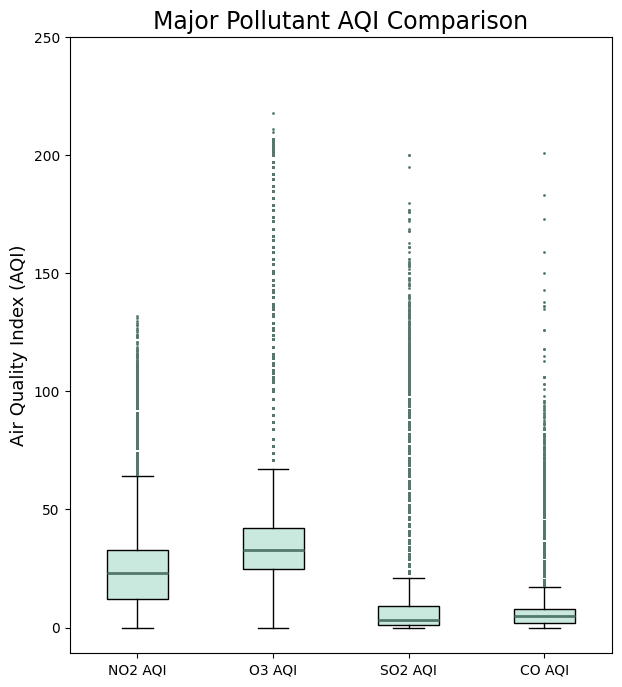

In [17]:
plt.figure(figsize = (7,8))

# plotting the boxplots for all 4 columns
labels = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']
medianprops = dict(color='#53786D', linewidth=2)    # modifying median characteristics
flierprops = dict(markeredgecolor = '#53786D', markersize=1)    # modifying flier (outlier) characteristics
boxprops = dict(facecolor =  '#C9E9DF')     # modifying inner color of each box
boxes = plt.boxplot([df['NO2 AQI'], df['O3 AQI'], df['SO2 AQI'], df['CO AQI']], tick_labels=labels, patch_artist=True, boxprops=boxprops, medianprops = medianprops, flierprops = flierprops)

# changing the title
plt.title('Major Pollutant AQI Comparison', fontdict={'fontsize':17})

# changing the y-label
plt.ylabel('Air Quality Index (AQI)', fontdict={'fontsize':13})

# making the step size of the y-ticks 50
plt.yticks(np.arange(0, 251, step = 50))

# customizing the inner color of the box plots
# for box in boxes['boxes']:
#     box.set(facecolor = '#C9E9DF')

plt.show()

As seen by from this box plot graph, all four of the major pollutants' AQI medians are under 50, which falls into the "good" category for air quality. The medians of the NO2 and O3 AQI box plots are higher than the boxes of SO2 and CO AQI. Furthermore, the SO2 and CO AQI box plots have smaller ranges than the NO2 and O3 AQI box plots, indicating that the data for SO2 and CO AQI are less dispersed. 

We can also see that all four of the pollutants' AQI many outliers, including extreme outliers. The largest outlier of NO2 AQI is much closer to the median compared to the largest outlier of any of the other three pollutants.

Lastly, all four of the box plots indicate that the NO2, O3, SO2, and CO AQI data are positively skewed. To confirm this, I will use the skew() method on each of the major pollutant AQIs.

In [18]:
df['NO2 AQI'].skew()

np.float64(0.8876834509874199)

In [19]:
df['O3 AQI'].skew()

np.float64(2.439107077521321)

In [20]:
df['SO2 AQI'].skew()

np.float64(3.8946971468705303)

In [21]:
df['CO AQI'].skew()

np.float64(3.67256847818267)

I can see here that because all four of the skewness values are greater than 0.5, they are positively skewed. The skewnewss of the NO2 AQI variable is between 0.5 and 1, making it moderately positively skewed. Meanwhile, the skewness of the O3 AQI, SO2 AQI, and CO AQI variables are all greater than 1. Therefore, we can conclude that the data for those three pollutants are highly positively skewed.

I will continue by plotting a histogram for each of the pollutant AQI variables to verify this. 

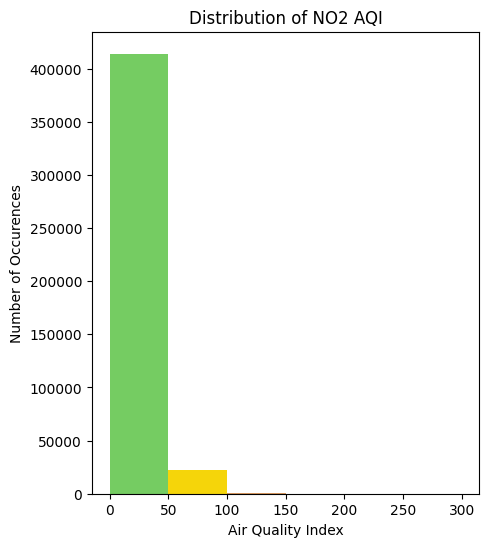

In [46]:
plt.figure(figsize = (5,6))

bins = np.arange(0, 301, 50)
n, bins, patches = plt.hist(df['NO2 AQI'], bins=bins)
plt.title('Distribution of NO2 AQI')
plt.xlabel('Air Quality Index')
plt.ylabel('Number of Occurences')

patches[0].set_facecolor('#75cc62')
patches[1].set_facecolor('#f5d50a')
patches[2].set_facecolor('#db9a60')
patches[3].set_facecolor('#e05555')
patches[4].set_facecolor('#ae5ed6')

<Figure size 2000x2000 with 0 Axes>

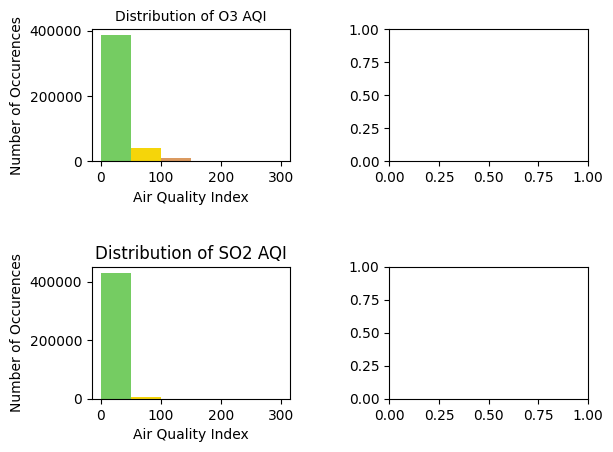

In [73]:
## TESTING

plt.figure(figsize = (20,20))

# creating a 2 by 2 subplot 
fig, axs = plt.subplots(2,2)

# adjusting space in between each subplot chart
plt.subplots_adjust(hspace=0.8, wspace=00.5) 

# creating graph for O3
bins = np.arange(0, 301, 50)    # setting bin size for all the graphs
n, bins, patches = axs[0,0].hist(df['O3 AQI'], bins=bins)
axs[0,0].set_title('Distribution of O3 AQI', fontsize = 10)
axs[0,0].set(xlabel='Air Quality Index', ylabel='Number of Occurences')

# setting bin colors
patches[0].set_facecolor('#75cc62')
patches[1].set_facecolor('#f5d50a')
patches[2].set_facecolor('#db9a60')
patches[3].set_facecolor('#e05555')
patches[4].set_facecolor('#ae5ed6')

n, bins, patches = axs[1,0].hist(df['SO2 AQI'], bins=bins)
axs[1,0].set_title('Distribution of SO2 AQI')
axs[1,0].set(xlabel='Air Quality Index', ylabel= 'Number of Occurences')

patches[0].set_facecolor('#75cc62')
patches[1].set_facecolor('#f5d50a')
patches[2].set_facecolor('#db9a60')
patches[3].set_facecolor('#e05555')
patches[4].set_facecolor('#ae5ed6')

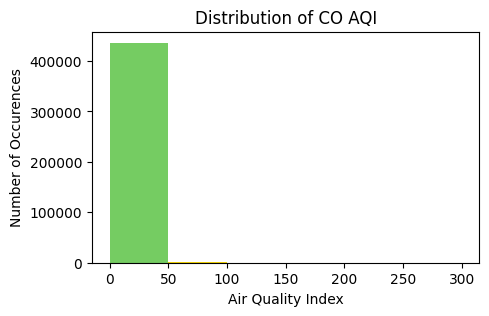

In [52]:
plt.figure(figsize = (5,3))

bins = np.arange(0, 301, 50)
n, bins, patches = plt.hist(df['CO AQI'], bins=bins)
plt.title('Distribution of CO AQI')
plt.xlabel('Air Quality Index')
plt.ylabel('Number of Occurences')

patches[0].set_facecolor('#75cc62')
patches[1].set_facecolor('#f5d50a')
patches[2].set_facecolor('#db9a60')
patches[3].set_facecolor('#e05555')
patches[4].set_facecolor('#ae5ed6')

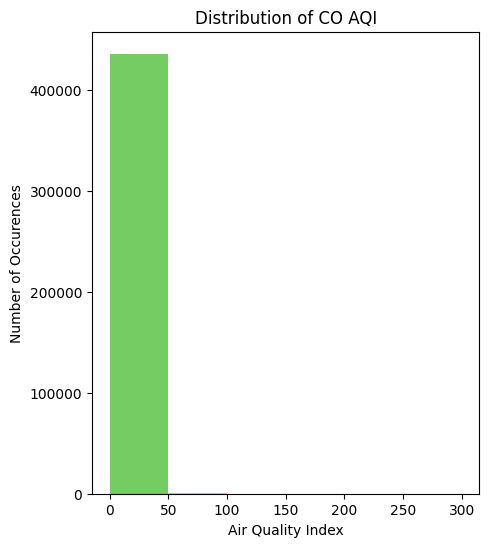

In [49]:
plt.figure(figsize = (5,6))

bins = np.arange(0, 301, 50)
n, bins, patches = plt.hist(df['CO AQI'], bins=bins)
plt.title('Distribution of CO AQI')
plt.xlabel('Air Quality Index')
plt.ylabel('Number of Occurences')

patches[0].set_facecolor('#75cc62')
patches[1].set_facecolor('#f5d50a')
patches[2].set_facecolor('#db9a60')
patches[3].set_facecolor('#e05555')
patches[4].set_facecolor('#ae5ed6')


## 6. Multivariate analysis